In [36]:
import sys
import xarray as xr
import numpy as np
from datetime import timedelta
from glob import glob
import cftime
import os


In [ ]:
filename= "/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/tas_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010300-199001010000.nc"
ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)

/tmp/ipykernel_56296/2769231274.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)


In [5]:
ds_rsds=xr.open_dataset("/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010130-198912312230.nc")

In [ ]:
# Extract the time coordinates
tas_time = ds_tas['time']
rsds_time = ds_rsds['time']
print("tas_time values:", tas_time.values)
print("rsds_time values:", rsds_time.values)

tas_time values: [cftime.DatetimeProlepticGregorian(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1980, 1, 1, 9, 0, 0, 0, has_year_zero=True)
 ...
 cftime.DatetimeProlepticGregorian(1989, 12, 31, 18, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1989, 12, 31, 21, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1990, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
rsds_time values: ['1980-01-01T01:30:00.000000000' '1980-01-01T04:30:00.000000000'
 '1980-01-01T07:30:00.000000000' ... '1989-12-31T16:30:00.000000000'
 '1989-12-31T19:30:00.000000000' '1989-12-31T22:30:00.000000000']


In [9]:
ds_tas

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 29224, lat: 144, bnds: 2, lon: 192)
Coordinates:
  * time      (time) object 234kB 1980-01-01 03:00:00 ... 1990-01-01 00:00:00
  * lat       (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon       (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height    float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 2kB ...
    lon_bnds  (lon, bnds) float64 3kB ...
    tas       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:28:10Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5f11e171-8508-4913-a536-76e4bde6f086
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [57]:
# Convert cftime time in tas to datetime64 (if needed)
if not np.issubdtype(ds_tas['time'].dtype, np.datetime64):
    ds_tas = ds_tas.assign_coords(time=ds_tas.indexes['time'].to_datetimeindex())

In [58]:
ds_tas

<xarray.Dataset> Size: 3GB
Dimensions:   (lat: 144, bnds: 2, lon: 192, time: 29224)
Coordinates:
  * lat       (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon       (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height    float64 8B ...
  * time      (time) datetime64[ns] 234kB 1980-01-01T03:00:00 ... 1990-01-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 2kB ...
    lon_bnds  (lon, bnds) float64 3kB ...
    tas       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:28:10Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5f11e171-8508-4913-a536-76e4bde6f086
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [59]:
ds_rsds

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 29224, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 468kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsds       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:27:09Z
    ...                     ...
    variable_id:            rsds
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/865baf14-fb60-4ba4-9102-0653ae02e364
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [60]:
# Interpolate tas to match rsds time
tas_interp = ds_tas['tas'].interp(time=ds_rsds['time'], method="linear")


In [61]:
print(tas_interp.shape)
tas_interp

(29224, 144, 192)


<xarray.DataArray 'tas' (time: 29224, lat: 144, lon: 192)> Size: 6GB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[259.10144043, 259.04736328, 258.99987793, ..., 259.3684082 ,
         259.35559082, 259.3157959 ],
        [259.81738281, 259.99462891, 260.01513672, ..., 259.69360352,
         259.46765137, 259.61303711],
        [254.98266602, 255.67053223, 255.61303711, ..., 255.38952637,
         255.39733887, 255.6463623 ],
...
        [242.6887207 , 242.79309082, 242.84985352, ..., 242.45471191,
         242.57019043, 242.62805176],
        [243.1751709 , 243.22229004, 243.2734375 , ..., 242.95739746,
         243.02587891, 243.06835938],
        [244.13171387, 244.02062988, 243.97119141, ..., 243.9888916 ,
         244.65783691, 244.03015137]],

       [[256.86254883, 256.86523438, 256.79406738, ..., 257.22277832,
         257.16833496, 257.01147461],
        [254.0736084 , 254.03967285, 254.01550293, ..., 254.10681152,
         253.99462891, 254.02636719],
        [253.74157715, 253.77307129, 253.70458984, ..., 253.59973145,
         253.63977051, 253.68798828],
        ...,
        [241.53894043, 241.63269043, 241.59289551, ..., 241.54797363,
         241.55761719, 241.58239746],
        [241.33435059, 241.39208984, 241.41589355, ..., 241.30407715,
         241.27453613, 241.33544922],
        [242.00402832, 242.0645752 , 242.1451416 , ..., 242.01538086,
         242.60632324, 241.97033691]]], shape=(29224, 144, 192))
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T2...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2019-11-08T03:28:02Z altered by CMOR: Treated scalar dime...

In [52]:
# Create a mask for the NaN values using .isnull()
nan_mask = tas_interp.isnull()

# For each time step, replace NaNs with the values from the next time step
for t in range(len(tas_interp.time) - 1):  # Exclude the last time step
    # Use .isel() to ensure the correct alignment of coordinates
    tas_interp[t] = tas_interp[t].where(~nan_mask[t], tas_interp.isel(time=t + 1))



In [53]:
print(tas_interp.dims)

('time', 'lat', 'lon')


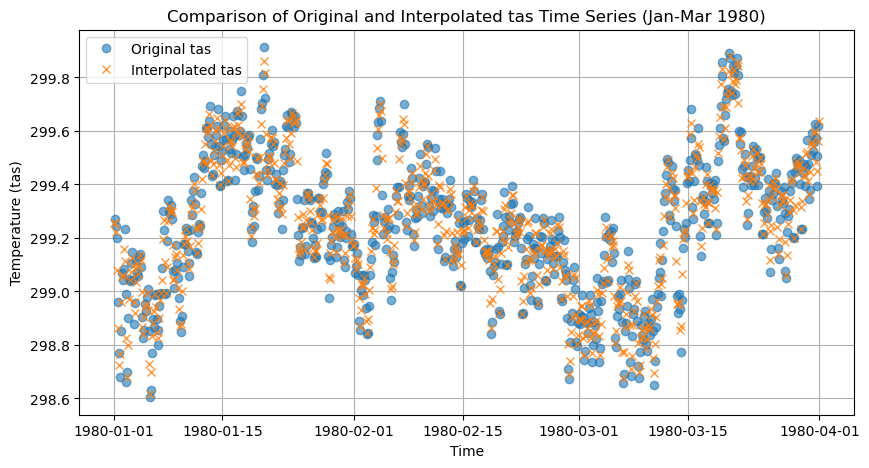

In [54]:
# Define a smaller time range (first 3 months of 1980)
time_subset = slice("1980-01-01", "1980-03-31")

# Subset the datasets
tas_subset = ds_tas['tas'].sel(time=time_subset)
tas_interp_subset = tas_interp.sel(time=time_subset)

# Select a single location for comparison
lat_sel = ds_tas['lat'].values[len(ds_tas['lat']) // 2]
lon_sel = ds_tas['lon'].values[len(ds_tas['lon']) // 2]

tas_original = tas_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')
tas_interp = tas_interp_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(tas_original['time'], tas_original, 'o', label='Original tas', alpha=0.6)
plt.plot(tas_interp['time'], tas_interp, 'x', label='Interpolated tas', alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Temperature (tas)')
plt.title('Comparison of Original and Interpolated tas Time Series (Jan-Mar 1980)')
plt.legend()
plt.grid()
plt.show()



In [55]:
# Check if lat and lon coordinates are the same
lat_match = (ds_tas['lat'].values == ds_rsds['lat'].values).all()
lon_match = (ds_tas['lon'].values == ds_rsds['lon'].values).all()

if lat_match and lon_match:
    print("✅ `tas` and `rsds` have the same spatial coordinates.")
else:
    print("⚠️ WARNING: `tas` and `rsds` have different spatial coordinates!")


✅ `tas` and `rsds` have the same spatial coordinates.


In [62]:
# Create a new dataset with interpolated temperature
ds_tas_interp = xr.Dataset(
    {
        "tas": (["time", "lat", "lon"], tas_interp.values)  # Interpolated temperature values
    },
    coords={
        "time": tas_interp["time"],  # Time coordinates
        "lat": tas_interp["lat"],    # Latitude coordinates from interpolated data
        "lon": tas_interp["lon"],    # Longitude coordinates from interpolated data
    }
)

# Generate the new filename dynamically (using the original filename)
import os
filename = "/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/tas_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010300-199001010000.nc"
dir_name = os.path.dirname(filename)
base_name = os.path.basename(filename)
new_base_name = base_name.replace("tas_", "tas_interpolated_")
new_filename = os.path.join(dir_name, new_base_name)

# Save the new dataset to a NetCDF file
ds_tas_interp.to_netcdf(new_filename)
print(f"✅ Interpolated `tas` saved as: {new_filename}")


✅ Interpolated `tas` saved as: /groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/tas_interpolated_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010300-199001010000.nc


In [64]:
ds_tas_interp=xr.open_dataset(new_filename)
ds_tas_interp

<xarray.Dataset> Size: 6GB
Dimensions:  (time: 29224, lat: 144, lon: 192)
Coordinates:
    height   float64 8B ...
  * time     (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T2...
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Data variables:
    tas      (time, lat, lon) float64 6GB ...

In [65]:
rsdsdiff_filename= "/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsdsdiff_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010130-198912312230.nc"
ds_rsdsdiff=xr.open_dataset(rsdsdiff_filename)

In [67]:
# Define the region of interest (Europe)
lon_min, lon_max = -10, 20
lat_min, lat_max = 35, 72

# Apply the selection to each dataset
rsds_europe = ds_rsds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
rsdsdiff_europe = ds_rsdsdiff.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
tas_europe = ds_tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [75]:
# Extract the variables from the datasets
rsds_data = rsds_europe['rsds']
rsdsdiff_data = rsdsdiff_europe['rsdsdiff']
tas_data = tas_europe['tas']

# Combine the three DataArrays into a single Dataset
combined_dataset = xr.Dataset(
    {
        'rsds': rsds_data,
        'rsdsdiff': rsdsdiff_data,
        'tas': tas_data,
    },
    coords=rsds_europe.coords,  # You can use the coordinates from any of the datasets
)
combined_dataset


<xarray.Dataset> Size: 116MB
Dimensions:   (time: 29224, lat: 30, lon: 11)
Coordinates:
  * time      (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T...
  * lat       (lat) float64 240B 35.62 36.88 38.12 39.38 ... 69.38 70.62 71.88
  * lon       (lon) float64 88B 0.9375 2.812 4.688 6.562 ... 15.94 17.81 19.69
    height    float64 8B ...
Data variables:
    rsds      (time, lat, lon) float32 39MB ...
    rsdsdiff  (time, lat, lon) float32 39MB ...
    tas       (time, lat, lon) float32 39MB nan nan nan nan ... nan nan nan nan

In [76]:
for year in combined_dataset.time.dt.year.values:
    # Extract data for this year
    yearly_data = combined_dataset.sel(time=str(year))
    
    # Save as .nc file
    yearly_data.to_netcdf(f'rsds_rsdsdiff_tas_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_{year}.nc')

KeyboardInterrupt: 